In [2]:
import numpy as np 
import networkx as nx  
import matplotlib.pyplot as plt
from graph import GraphColoring
from vqe import GraphColorVQE
from grover import GraphColorGrover

## Ising Hamiltonian using Exact Eigensolver

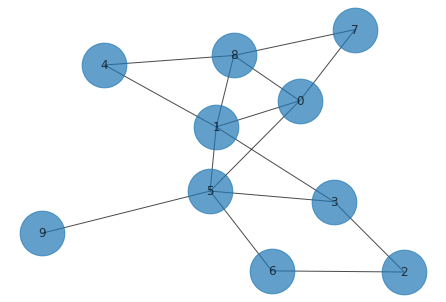

Operator with number of qubits: 30


In [ ]:
edges = [[5,1],[3,1],[4,1],[5,0],[5,3],[8,4],[6,5],[7,8],[0,7],[8,1],[2,3],[2,6],[0,1],[0,8],[5,9]]
g = GraphColoring(ncolors=3, edges=edges, nnodes=10)
g.render_graph()

vqeGC = GraphColorVQE(g,niter=50) 
solution = vqeGC.run_exact()

g.render_graph(solution)

## Ising Hamiltonian using Variational Quantum Eigensolver on simulator

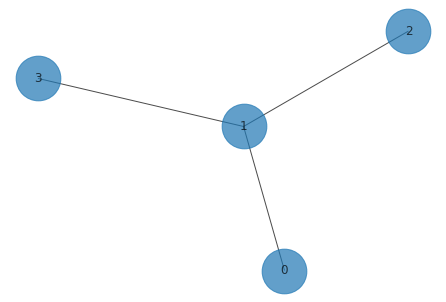

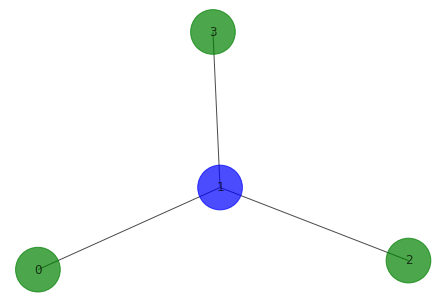

In [20]:
edges = [[1,0],[1,2],[1,3]]
g = GraphColoring(ncolors=2, edges=edges, nnodes=4) 
g.render_graph()

vqeGC = GraphColorVQE(g,niter=80) 
solution = vqeGC.run_sim()

g.render_graph(solution)

## Ising Hamiltonian using Variational Quantum Eigensolver on simulator

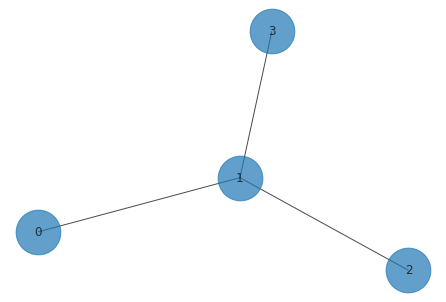

Operator with number of qubits: 8


Qasm simulation does not work on matrix mode, changing the operator_mode to "paulis"


Using backend: ibmq_16_melbourne


In [ ]:
edges = [[1,0],[1,2],[1,3]]
g = GraphColoring(ncolors=2, edges=edges, nnodes=4) 
g.render_graph()

vqeGC = GraphColorVQE(g,niter=50) 
solution = vqeGC.run_IBMQ()

g.render_graph(solution)